In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_pickle('summary_df.pkl')
df2 = pd.read_pickle('summary_df_test.pkl')
df3 = pd.read_pickle('summary_df_test_2.pkl')

In [3]:
df = pd.concat([df1, df2, df3])

In [4]:
df.head()

,IR,QC,QD,Tavg,Tmin,Tmax,chargetime,cycle,cell,cycle_life,C1,C2,Q1
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,b1c0,1190,3.6,3.6,80
1,0.016739,1.071289,1.070312,31.875000,29.562500,35.65625,13.343750,2.0,b1c0,1190,3.6,3.6,80
2,0.016724,1.071289,1.072266,31.937500,29.609375,35.68750,13.421875,3.0,b1c0,1190,3.6,3.6,80
3,0.016678,1.072266,1.072266,31.937500,29.750000,35.68750,13.421875,4.0,b1c0,1190,3.6,3.6,80
4,0.016663,1.073242,1.073242,31.953125,29.640625,35.71875,13.343750,5.0,b1c0,1190,3.6,3.6,80


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110312 entries, 0 to 1799
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IR          110312 non-null  float16
 1   QC          110312 non-null  float16
 2   QD          110312 non-null  float16
 3   Tavg        110312 non-null  float16
 4   Tmin        110312 non-null  float16
 5   Tmax        110312 non-null  float16
 6   chargetime  110312 non-null  float16
 7   cycle       110312 non-null  float64
 8   cell        110312 non-null  object 
 9   cycle_life  110312 non-null  int16  
 10  C1          110312 non-null  float64
 11  C2          110312 non-null  float64
 12  Q1          110312 non-null  int64  
dtypes: float16(7), float64(3), int16(1), int64(1), object(1)
memory usage: 6.7+ MB


In [6]:
df.describe()

,IR,QC,QD,Tavg,Tmin,Tmax,chargetime,cycle,cycle_life,C1,C2,Q1
count,110312.000000,110312.000000,110312.000000,110312.00000,110312.000000,110312.00000,110312.000000,110312.000000,110312.000000,110312.000000,110312.000000,110312.000000
mean,0.016586,NaN,NaN,NaN,NaN,NaN,NaN,461.308942,917.014658,5.126266,4.127492,49.518711
std,0.001359,0.000000,0.000000,0.00000,0.000000,0.00000,NaN,333.996982,356.343171,1.388807,0.726586,22.851391
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000,148.000000,0.000000,3.000000,2.000000
25%,0.015564,1.014648,1.014648,32.90625,30.125000,36.28125,10.054688,201.000000,663.000000,4.800000,3.600000,31.000000
50%,0.016556,1.048828,1.048828,33.96875,31.046875,38.09375,10.468750,404.000000,876.000000,5.400000,4.000000,50.000000
75%,0.017319,1.067383,1.067383,35.46875,32.406250,39.75000,11.414062,658.000000,1078.000000,5.600000,4.600000,67.000000
max,0.024399,2.966797,2.884766,41.43750,36.687500,44.65625,1290.000000,1934.000000,1935.000000,8.000000,6.000000,80.000000


In [7]:
df['cycle_life'].value_counts()

1935    1934
1836    1835
1801    1800
876     1750
870     1738
        ... 
438      464
335      361
300      326
209      208
148      170
Name: cycle_life, Length: 127, dtype: int64

In [20]:
df.shape

(110312, 13)

In [21]:
df = df[df['IR'] != 0]

In [22]:
df.shape

(110244, 13)

In [23]:
y = df['cycle_life']

In [24]:
X = df.drop(['cycle_life','cell','cycle'], axis = 1)

In [27]:
print(X.shape)
X.head()


(110244, 10)


,IR,QC,QD,Tavg,Tmin,Tmax,chargetime,C1,C2,Q1
1,0.016739,1.071289,1.070312,31.875000,29.562500,35.65625,13.343750,3.6,3.6,80
2,0.016724,1.071289,1.072266,31.937500,29.609375,35.68750,13.421875,3.6,3.6,80
3,0.016678,1.072266,1.072266,31.937500,29.750000,35.68750,13.421875,3.6,3.6,80
4,0.016663,1.073242,1.073242,31.953125,29.640625,35.71875,13.343750,3.6,3.6,80
5,0.016617,1.073242,1.073242,31.968750,29.750000,35.71875,13.343750,3.6,3.6,80


In [28]:
print(y.shape)
y.head()

(110244,)


1    1190
2    1190
3    1190
4    1190
5    1190
Name: cycle_life, dtype: int16

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)

In [31]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)


(77170, 10)
(77170,)
(33074, 10)
(33074,)


In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
reg_lin = LinearRegression(normalize=True)

In [34]:
reg_lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [35]:
y_pred = reg_lin.predict(X_test)

(0, 1200)

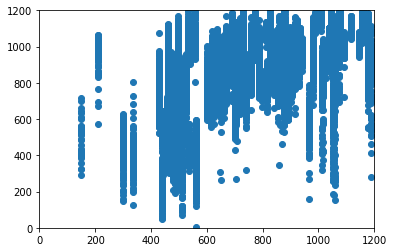

In [36]:
plt.scatter(y_test, y_pred)
plt.xlim(0,1200)
plt.ylim(0,1200)

In [37]:
from sklearn import metrics

In [38]:
from sklearn.ensemble import RandomForestRegressor
Forest = RandomForestRegressor(n_estimators=500)
Forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [39]:
y_pred = Forest.predict(X_test)

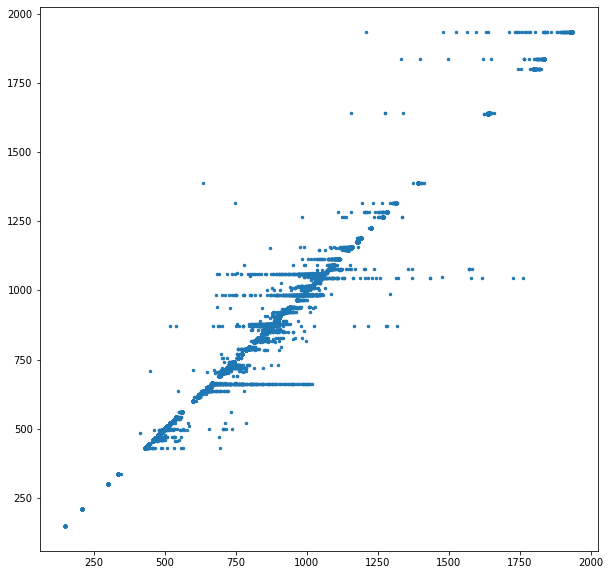

In [40]:
plt.figure(figsize=(10,10))
plt.scatter(y_pred, y_test, s=6)

In [41]:
import xgboost as xgb

regr = xgb.XGBRegressor(
                 
                 gamma=0.0,
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                  
                 reg_alpha=0.9,
                 reg_lambda=0.6,
                 )

regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)


/home/tam/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


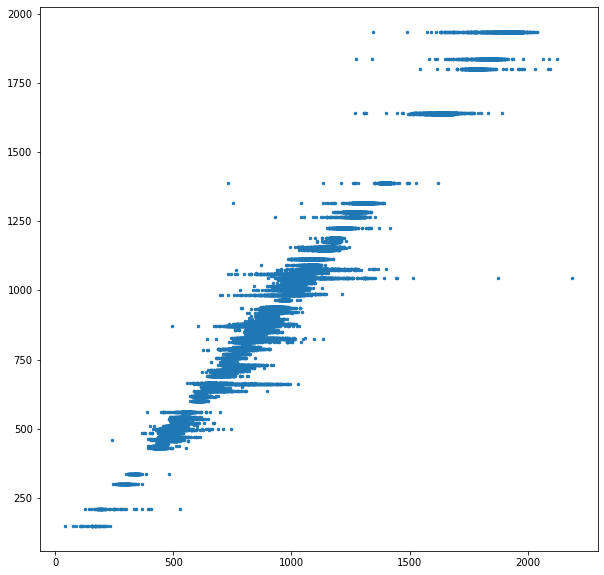

In [42]:
plt.figure(figsize=(10,10))
plt.scatter(y_pred, y_test, s=6)


In [43]:
from sklearn.linear_model import Lasso


best_alpha = 0.00099

regr = Lasso(alpha=best_alpha, max_iter=50000)
regr.fit(X_train, y_train)



Lasso(alpha=0.00099, copy_X=True, fit_intercept=True, max_iter=50000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [44]:
y_pred = regr.predict(X_test)

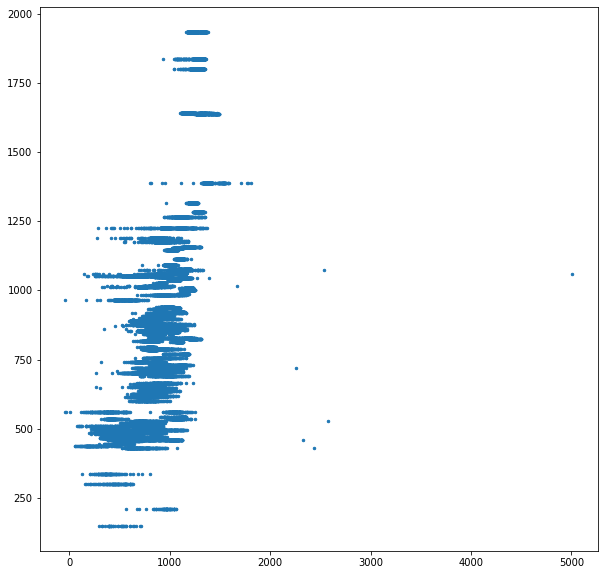

In [45]:
plt.figure(figsize=(10,10))
plt.scatter(y_pred, y_test, s=6)


In [46]:

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


alpha=[0.01]#, 0.03, 0.1, 0.3, 1, 3, 10, 30]

ridge=Ridge(alpha=alpha, copy_X=True, fit_intercept=True)
ridge.fit(X_train, y_train)
pred=ridge.predict(X_test)


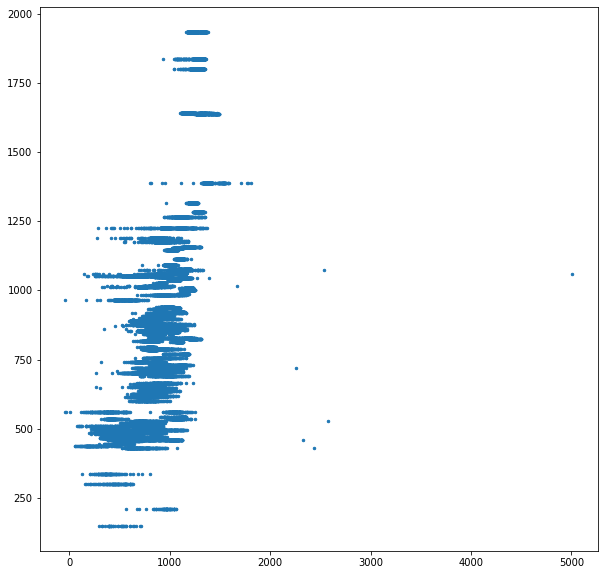

In [47]:
plt.figure(figsize=(10,10))
plt.scatter(y_pred, y_test, s=6)